# 1. Import of libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import datetime
from google.colab import files # Used to print the glossary image of the data on the notebook.
from IPython.display import Image # Used to print the glossary image of the data on the notebook.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Mastermind_colab/Personal_notebooks/Proyectos/Nba/CSV_data/Player_stats2324 _NBA.csv"

df_players = pd.read_csv(path)

In [ ]:
df_players.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,29.9,33,34.2,38.8,13.8,401,...,5.8,1.1,1.8,3.6,47.4,41.8,53.2,15.6,127.8,104.0
1,NaN,Luka Doncic,Dal,G,24.9,37,36.9,36.3,14.3,329,...,9.3,1.4,0.6,3.9,42.1,42.8,51.4,15.0,120.6,112.8
2,NaN,Giannis Antetokounmpo,Mil,F,29.1,42,35.2,33.4,15.7,474,...,6.2,1.3,1.1,3.6,43.0,37.5,49.2,14.9,125.2,108.1
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.5,43,34.4,32.8,9.4,392,...,6.5,2.3,0.8,2.1,36.8,37.6,43.2,12.1,131.9,108.0
4,NaN,Kevin Durant,Pho,F,35.3,37,37.1,30.1,13.7,260,...,5.7,0.9,1.2,3.1,35.5,34.8,41.2,11.0,123.3,113.4


# 2. Data cleaning

> - We are going to identify what each of the pandas series (columns of our dataframe) indicate and we are going to perform a data cleansing.
> - Below is a glossary of what the indicators of each of the columns of the dataframe mean.

In [ ]:
uploaded = files.upload() # I use this method becouse I have problems using the markdawn to print the image

Saving Player_glossary.PNG to Player_glossary.PNG


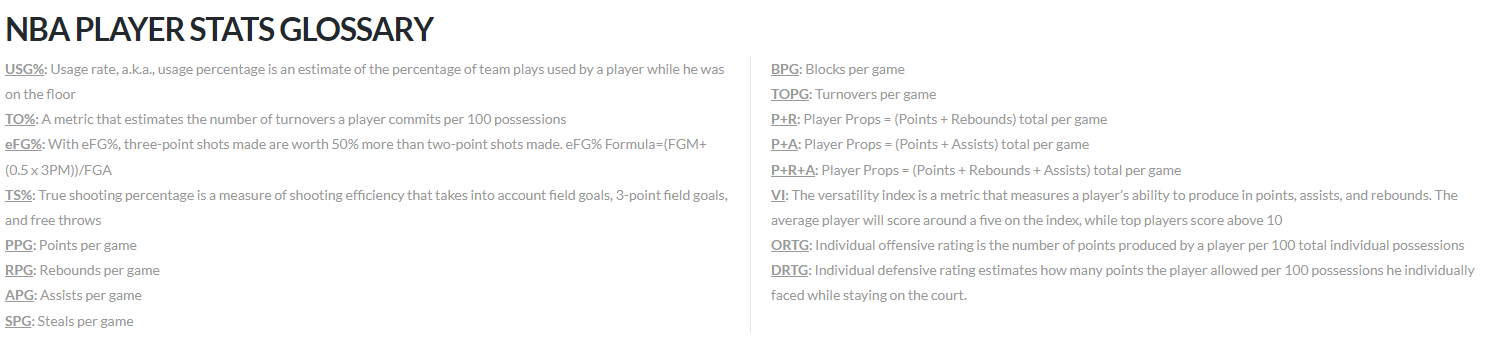

In [ ]:
Image("Player_glossary.PNG")

> - We are going to drop the information that is not relevent for us.

In [ ]:
df_players.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')

In [ ]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    555 non-null    object 
 2   TEAM    555 non-null    object 
 3   POS     555 non-null    object 
 4   AGE     555 non-null    float64
 5   GP      555 non-null    int64  
 6   MPG     555 non-null    float64
 7   USG%    555 non-null    float64
 8   TO%     555 non-null    float64
 9   FTA     555 non-null    int64  
 10  FT%     555 non-null    float64
 11  2PA     555 non-null    int64  
 12  2P%     555 non-null    float64
 13  3PA     555 non-null    int64  
 14  3P%     555 non-null    float64
 15  eFG%    555 non-null    float64
 16  TS%     555 non-null    float64
 17  PPG     555 non-null    float64
 18  RPG     555 non-null    float64
 19  APG     555 non-null    float64
 20  SPG     555 non-null    float64
 21  BPG     555 non-null    float64
 22  TP

In [ ]:
df_players.drop(["TO%", "eFG%", "TS%", "P+R", "P+A", "P+R+A", "VI", "ORtg", "DRtg"], axis=1, inplace=True)

In [ ]:
df_players.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'FTA', 'FT%',
       '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG'],
      dtype='object')

In [ ]:
df_players.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,FTA,FT%,2PA,2P%,3PA,3P%,PPG,RPG,APG,SPG,BPG,TPG
0,NaN,Joel Embiid,Phi,C,29.9,33,34.2,38.8,401,0.883,630,0.568,106,0.368,36.0,11.4,5.8,1.1,1.8,3.6
1,NaN,Luka Doncic,Dal,G,24.9,37,36.9,36.3,329,0.769,495,0.566,383,0.373,33.6,8.5,9.3,1.4,0.6,3.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.1,42,35.2,33.4,474,0.669,734,0.642,75,0.240,31.3,11.7,6.2,1.3,1.1,3.6
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.5,43,34.4,32.8,392,0.890,716,0.591,146,0.329,31.1,5.6,6.5,2.3,0.8,2.1
4,NaN,Kevin Durant,Pho,F,35.3,37,37.1,30.1,260,0.873,535,0.555,187,0.455,29.1,6.4,5.7,0.9,1.2,3.1


# 3. Solving data problems and restructuring the dataframe

> ## 3.1 Transforming the titles of the pandas series into lower case letters

In [ ]:
df_players.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'FTA', 'FT%',
       '2PA', '2P%', '3PA', '3P%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG'],
      dtype='object')

In [ ]:
df_players.columns = df_players.columns.str.replace('%', '_per').str.lower()

In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,fta,ft_per,2pa,2p_per,3pa,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,NaN,Joel Embiid,Phi,C,29.9,33,34.2,38.8,401,0.883,630,0.568,106,0.368,36.0,11.4,5.8,1.1,1.8,3.6
1,NaN,Luka Doncic,Dal,G,24.9,37,36.9,36.3,329,0.769,495,0.566,383,0.373,33.6,8.5,9.3,1.4,0.6,3.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.1,42,35.2,33.4,474,0.669,734,0.642,75,0.240,31.3,11.7,6.2,1.3,1.1,3.6
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.5,43,34.4,32.8,392,0.890,716,0.591,146,0.329,31.1,5.6,6.5,2.3,0.8,2.1
4,NaN,Kevin Durant,Pho,F,35.3,37,37.1,30.1,260,0.873,535,0.555,187,0.455,29.1,6.4,5.7,0.9,1.2,3.1


> ## 3.2 Modifying the percentage (2p_per and 3p_per) to put it in base 100

In [ ]:
df_players[["ft_per", "2p_per","3p_per"]] = (df_players[["ft_per", "2p_per","3p_per"]] * 100).round(1)

In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,fta,ft_per,2pa,2p_per,3pa,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,NaN,Joel Embiid,Phi,C,29.9,33,34.2,38.8,401,88.3,630,56.8,106,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,NaN,Luka Doncic,Dal,G,24.9,37,36.9,36.3,329,76.9,495,56.6,383,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.1,42,35.2,33.4,474,66.9,734,64.2,75,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.5,43,34.4,32.8,392,89.0,716,59.1,146,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,NaN,Kevin Durant,Pho,F,35.3,37,37.1,30.1,260,87.3,535,55.5,187,45.5,29.1,6.4,5.7,0.9,1.2,3.1


> ### Adding ft_game, 2p_game, 3p_game to the dataframe

In [ ]:
df_players["ft_game"] = (df_players["fta"] / df_players["gp"]).round(1)
df_players["2p_game"] = (df_players["2pa"] / df_players["gp"]).round(1)
df_players["3p_game"] = (df_players["3pa"] / df_players["gp"]).round(1)

In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,fta,ft_per,...,3p_per,ppg,rpg,apg,spg,bpg,tpg,ft_game,2p_game,3p_game
0,NaN,Joel Embiid,Phi,C,29.9,33,34.2,38.8,401,88.3,...,36.8,36.0,11.4,5.8,1.1,1.8,3.6,12.2,19.1,3.2
1,NaN,Luka Doncic,Dal,G,24.9,37,36.9,36.3,329,76.9,...,37.3,33.6,8.5,9.3,1.4,0.6,3.9,8.9,13.4,10.4
2,NaN,Giannis Antetokounmpo,Mil,F,29.1,42,35.2,33.4,474,66.9,...,24.0,31.3,11.7,6.2,1.3,1.1,3.6,11.3,17.5,1.8
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.5,43,34.4,32.8,392,89.0,...,32.9,31.1,5.6,6.5,2.3,0.8,2.1,9.1,16.7,3.4
4,NaN,Kevin Durant,Pho,F,35.3,37,37.1,30.1,260,87.3,...,45.5,29.1,6.4,5.7,0.9,1.2,3.1,7.0,14.5,5.1


> - Reorganization of the dataframe. Drop the total attemps and include only the attemps per game

In [ ]:
df_players = df_players[['rank', 'name', 'team', 'pos', 'age', 'gp', 'mpg', 'usg_per',
       'ft_game','ft_per', '2p_game', '2p_per', '3p_game', '3p_per', 'ppg', 'rpg', 'apg', 'spg',
       'bpg', 'tpg']]

In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,NaN,Joel Embiid,Phi,C,29.9,33,34.2,38.8,12.2,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,NaN,Luka Doncic,Dal,G,24.9,37,36.9,36.3,8.9,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.1,42,35.2,33.4,11.3,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.5,43,34.4,32.8,9.1,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,NaN,Kevin Durant,Pho,F,35.3,37,37.1,30.1,7.0,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1


> ## 3.3 Modifiying the age to an integer

In [ ]:
df_players["age"] = df_players["age"].apply(int)

In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,NaN,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,NaN,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,NaN,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,NaN,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,NaN,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1


> ## 3.4 Transforming the NaN to the best players ranking

In [ ]:
len = len(df_players["rank"])  # ajusta la longitud según tus necesidades
values = []
# Bucle para generar la secuencia
for i in range(1, len + 1):
    values.append(i)

TypeError: 'int' object is not callable

In [ ]:
df_players["rank"] = values

In [ ]:
df_players.set_index("rank")

,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
rank,,,,,,,,,,,,,,,,,,,
1,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
2,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
3,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
4,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
5,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Jordan Walsh,Bos,G,19,2,3.2,6.8,0.0,0.0,0.0,0.0,0.5,0.0,0.0,2.5,0.5,0.0,0.0,0.0
552,Frank Ntilikina,Cha,G,25,2,6.2,10.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.5
553,Kevon Harris,Orl,G,26,1,3.2,13.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


> ## 3.5 EXTRA!! Transforming Nan according to players' ppg

In [ ]:
df_players_ppg = df_players

In [ ]:
df_players_ppg["rank"] = np.nan
df_players_ppg.head()

,rank,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,NaN,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,NaN,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,NaN,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,NaN,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,NaN,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1


In [ ]:
df_players_ppg['rank'].fillna(df_players_ppg['ppg'].rank(ascending=False, method='min'), inplace=True)

df_players_ppg = df_players_ppg.sort_values(by='rank', ascending=True)

In [ ]:
df_players_ppg.head(20)

,rank,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,1.0,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,2.0,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,3.0,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,4.0,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,5.0,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1
5,6.0,Donovan Mitchell,Cle,G,27,33,35.5,32.1,6.0,87.4,12.0,54.8,8.9,34.2,27.6,5.4,6.2,1.9,0.4,2.8
6,7.0,De'Aaron Fox,Sac,G,26,37,35.6,31.3,6.7,72.6,12.8,51.5,8.1,39.1,27.5,4.1,5.6,1.6,0.4,2.5
7,8.0,Devin Booker,Pho,G,27,35,36.1,30.0,6.9,88.1,13.4,54.3,5.8,38.1,27.2,4.9,7.5,0.9,0.3,2.7
8,9.0,Jayson Tatum,Bos,F,25,42,35.9,30.0,7.3,81.1,11.0,54.9,8.3,36.2,27.0,8.4,4.4,1.0,0.5,2.5
9,10.0,Trae Young,Atl,G,25,39,36.3,31.1,8.2,85.8,10.6,47.2,9.0,36.4,26.9,3.0,10.8,1.4,0.2,4.3


# 4. Transforming the dataframe into a CSV

In [ ]:
df_players.columns

Index(['rank', 'name', 'team', 'pos', 'age', 'gp', 'mpg', 'usg_per', 'ft_game',
       'ft_per', '2p_game', '2p_per', '3p_game', '3p_per', 'ppg', 'rpg', 'apg',
       'spg', 'bpg', 'tpg'],
      dtype='object')

In [ ]:
df_players[['mpg', 'usg_per', 'ft_per', '2p_game', '2p_per', '3p_game', '3p_per',
            'ppg', 'rpg', 'apg', 'spg', 'bpg', 'tpg']].round(1)

,mpg,usg_per,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,34.2,38.8,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,36.9,36.3,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,35.2,33.4,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,34.4,32.8,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,37.1,30.1,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,3.2,6.8,0.0,0.0,0.0,0.5,0.0,0.0,2.5,0.5,0.0,0.0,0.0
551,6.2,10.5,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.5
552,3.2,13.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
553,2.1,20.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg
0,1.0,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,19.1,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6
1,2.0,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,13.4,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9
2,3.0,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,17.5,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6
3,4.0,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,16.7,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1
4,5.0,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,14.5,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1


## - We create a new columns which are necesary to obtain the team's logos an player's photos

In [ ]:
logo_names = {"Atl": "nba-atlanta-hawks-logo",
              "Bos": "nba-boston-celtics-logo",
              "Chi": "nba-chicago-bulls-logo",
              "Cha": "nba-charlotte-hornets-logo",
              "Bro": "nba-brooklyn-nets-logo",
              "Cle": "Clevelan-Cavaliers-logo-2022",
              "Mia": "nba-miami-heat-logo",
              "Nyk": "nba-new-york-knicks-logo",
              "Det": "nba-detroit-pistons-logo",
              "Orl": "nba-orlando-magic-logo",
              "Phi": "nba-philadelphia-76ers-logo",
              "Ind": "nba-indiana-pacers-logo",
              "Was": "nba-washington-wizards-logo",
              "Tor": "nba-toronto-raptors-logo",
              "Mil": "nba-milwaukee-bucks-logo",
              "Dal": "nba-dallas-mavericks-logo",
              "Den": "nba-denver-nuggets-logo-2018",
              "Gol": "nba-golden-state-warriors-logo-2020",
              "Hou": "nba-houston-rockets-logo-2020",
              "Min": "nba-minnesota-timberwolves-logo",
              "Lac": "nba-la-clippers-logo",
              "Mem": "nba-memphis-grizzlies-logo",
              "Okc": "nba-oklahoma-city-thunder-logo",
              "Lal": "nba-los-angeles-lakers-logo",
              "Nor": "nba-new-orleans-pelicans-logo",
              "Por": "nba-portland-trail-blazers-logo",
              "Pho": "nba-phoenix-suns-logo",
              "San": "nba-san-antonio-spurs-logo",
              "Uta": "utah-jazz-logo-2022",
              "Sac": "nba-sacramento-kings-logo"
              }

In [ ]:
df_players['logo_name'] = df_players['team'].map(logo_names)

In [ ]:
df_players.head()

,rank,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,...,2p_per,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg,logo_name
0,1.0,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,...,56.8,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6,nba-philadelphia-76ers-logo
1,2.0,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,...,56.6,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9,nba-dallas-mavericks-logo
2,3.0,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,...,64.2,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6,nba-milwaukee-bucks-logo
3,4.0,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,...,59.1,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1,nba-oklahoma-city-thunder-logo
4,5.0,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,...,55.5,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1,nba-phoenix-suns-logo


In [ ]:
df_players[['apellido', 'nombre']] = df_players['name'].str.split(' ', 1, expand=True)

<ipython-input-120-e5dbb21a8217>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_players[['apellido', 'nombre']] = df_players['name'].str.split(' ', 1, expand=True)


In [ ]:
df_players['surname_name'] = df_players['nombre'] + '_' + df_players['apellido']

In [ ]:
df_players.drop(["apellido", "nombre"], axis=1, inplace=True)

In [ ]:
df_players.set_index("rank")

,name,team,pos,age,gp,mpg,usg_per,ft_game,ft_per,2p_game,...,3p_game,3p_per,ppg,rpg,apg,spg,bpg,tpg,logo_name,surname_name
rank,,,,,,,,,,,,,,,,,,,,,
1.0,Joel Embiid,Phi,C,29,33,34.2,38.8,12.2,88.3,19.1,...,3.2,36.8,36.0,11.4,5.8,1.1,1.8,3.6,nba-philadelphia-76ers-logo,Embiid_Joel
2.0,Luka Doncic,Dal,G,24,37,36.9,36.3,8.9,76.9,13.4,...,10.4,37.3,33.6,8.5,9.3,1.4,0.6,3.9,nba-dallas-mavericks-logo,Doncic_Luka
3.0,Giannis Antetokounmpo,Mil,F,29,42,35.2,33.4,11.3,66.9,17.5,...,1.8,24.0,31.3,11.7,6.2,1.3,1.1,3.6,nba-milwaukee-bucks-logo,Antetokounmpo_Giannis
4.0,Shai Gilgeous-Alexander,Okc,G,25,43,34.4,32.8,9.1,89.0,16.7,...,3.4,32.9,31.1,5.6,6.5,2.3,0.8,2.1,nba-oklahoma-city-thunder-logo,Gilgeous-Alexander_Shai
5.0,Kevin Durant,Pho,F,35,37,37.1,30.1,7.0,87.3,14.5,...,5.1,45.5,29.1,6.4,5.7,0.9,1.2,3.1,nba-phoenix-suns-logo,Durant_Kevin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534.0,Jordan Walsh,Bos,G,19,2,3.2,6.8,0.0,0.0,0.0,...,0.5,0.0,0.0,2.5,0.5,0.0,0.0,0.0,nba-boston-celtics-logo,Walsh_Jordan
534.0,Frank Ntilikina,Cha,G,25,2,6.2,10.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.5,0.5,0.0,0.0,0.5,nba-charlotte-hornets-logo,Ntilikina_Frank
534.0,Kevon Harris,Orl,G,26,1,3.2,13.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,nba-orlando-magic-logo,Harris_Kevon


In [ ]:
df_players.to_csv('NBA_players_clean_stats1.csv', index=False)

In [ ]:
df_players["logo_name"].to_csv('logo_names.csv', index=False)

In [ ]:
df_players["surname_name"].to_csv('surname_name.csv', index=False)

In [ ]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       555 non-null    int64  
 1   name       555 non-null    object 
 2   team       555 non-null    object 
 3   pos        555 non-null    object 
 4   age        555 non-null    int64  
 5   gp         555 non-null    int64  
 6   mpg        555 non-null    float64
 7   usg_per    555 non-null    float64
 8   ft_game    554 non-null    float64
 9   ft_per     555 non-null    float64
 10  2p_game    554 non-null    float64
 11  2p_per     555 non-null    float64
 12  3p_game    554 non-null    float64
 13  3p_per     555 non-null    float64
 14  ppg        555 non-null    float64
 15  rpg        555 non-null    float64
 16  apg        555 non-null    float64
 17  spg        555 non-null    float64
 18  bpg        555 non-null    float64
 19  tpg        555 non-null    float64
 20  logo_name 